2105208_MILAN KUMAR SAHOO

In [1]:
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix,mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
import seaborn as sns #data visualisation

import warnings
warnings.filterwarnings('ignore')


In [3]:
# loading the data from sklearn
df = pd.read_csv('kidney_disease.csv')

In [4]:
# printing the first 5 rows of the dataframe
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
# number of rows and columns in the dataframe
df.shape

(400, 26)

In [6]:
# getting more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
# getting some statistical measures about the data
df.describe()


,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:

# distribution of target Variable
df['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [9]:
#encoding the target column
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

labels = label_encode.fit_transform(df["classification"])

df["target"] = labels

df.drop(columns = "classification", axis = 1, inplace = True)

In [10]:
df["target"].value_counts()


target
0    248
2    150
1      2
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

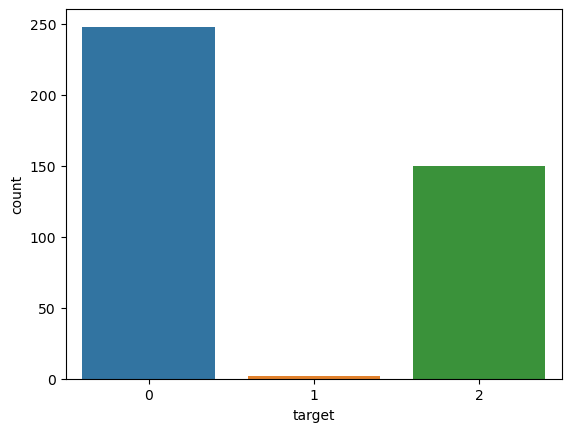

In [12]:
# target countplot
sns.countplot(x = 'target',data = df)

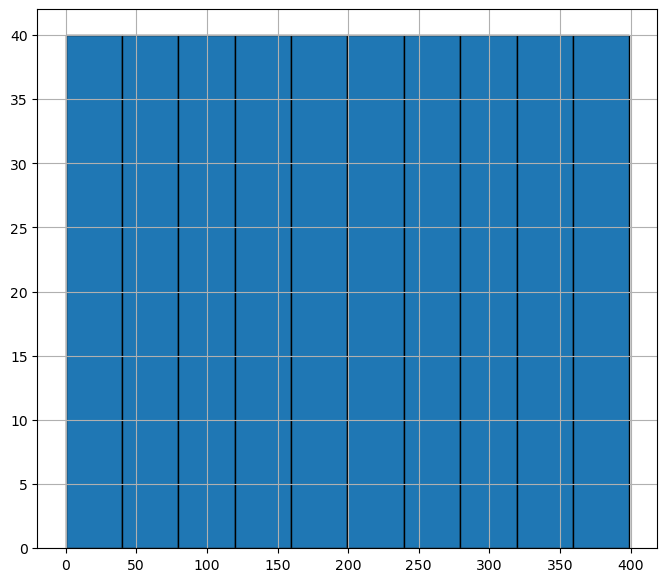

In [13]:
# Plot the histogram of the id variable
plt.figure(figsize=(8,7))
df["id"].hist(edgecolor = "black");

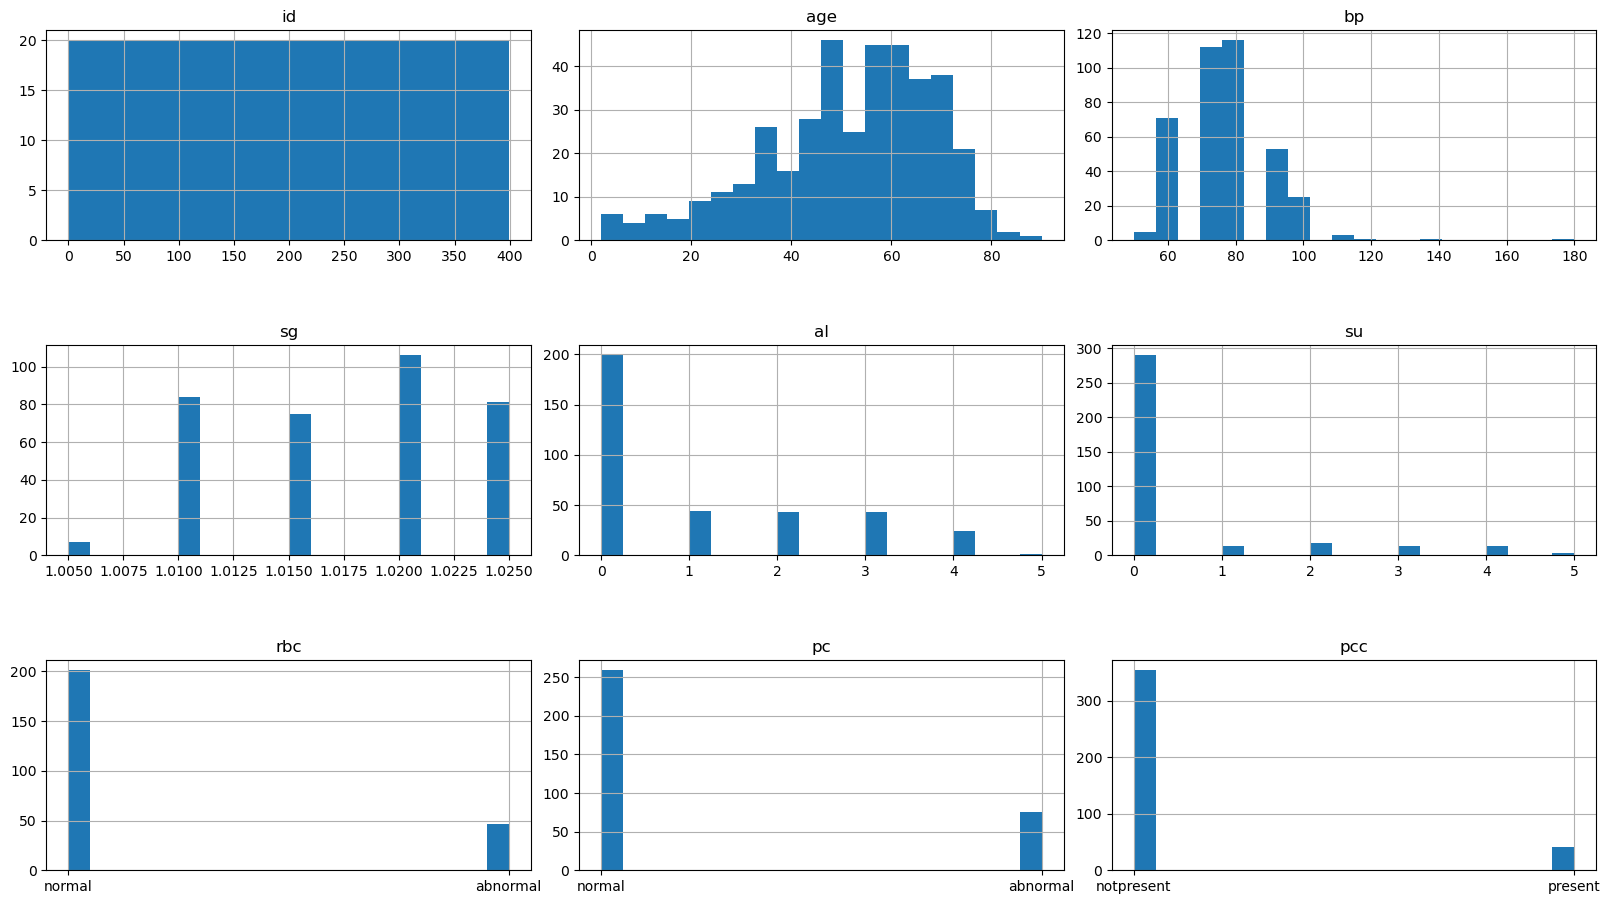

In [14]:
 #Histogram of each feature
import itertools

col = df.columns[:9]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot(int((length/2)), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    df[i].hist(bins = 20)
    plt.title(i)
plt.show()

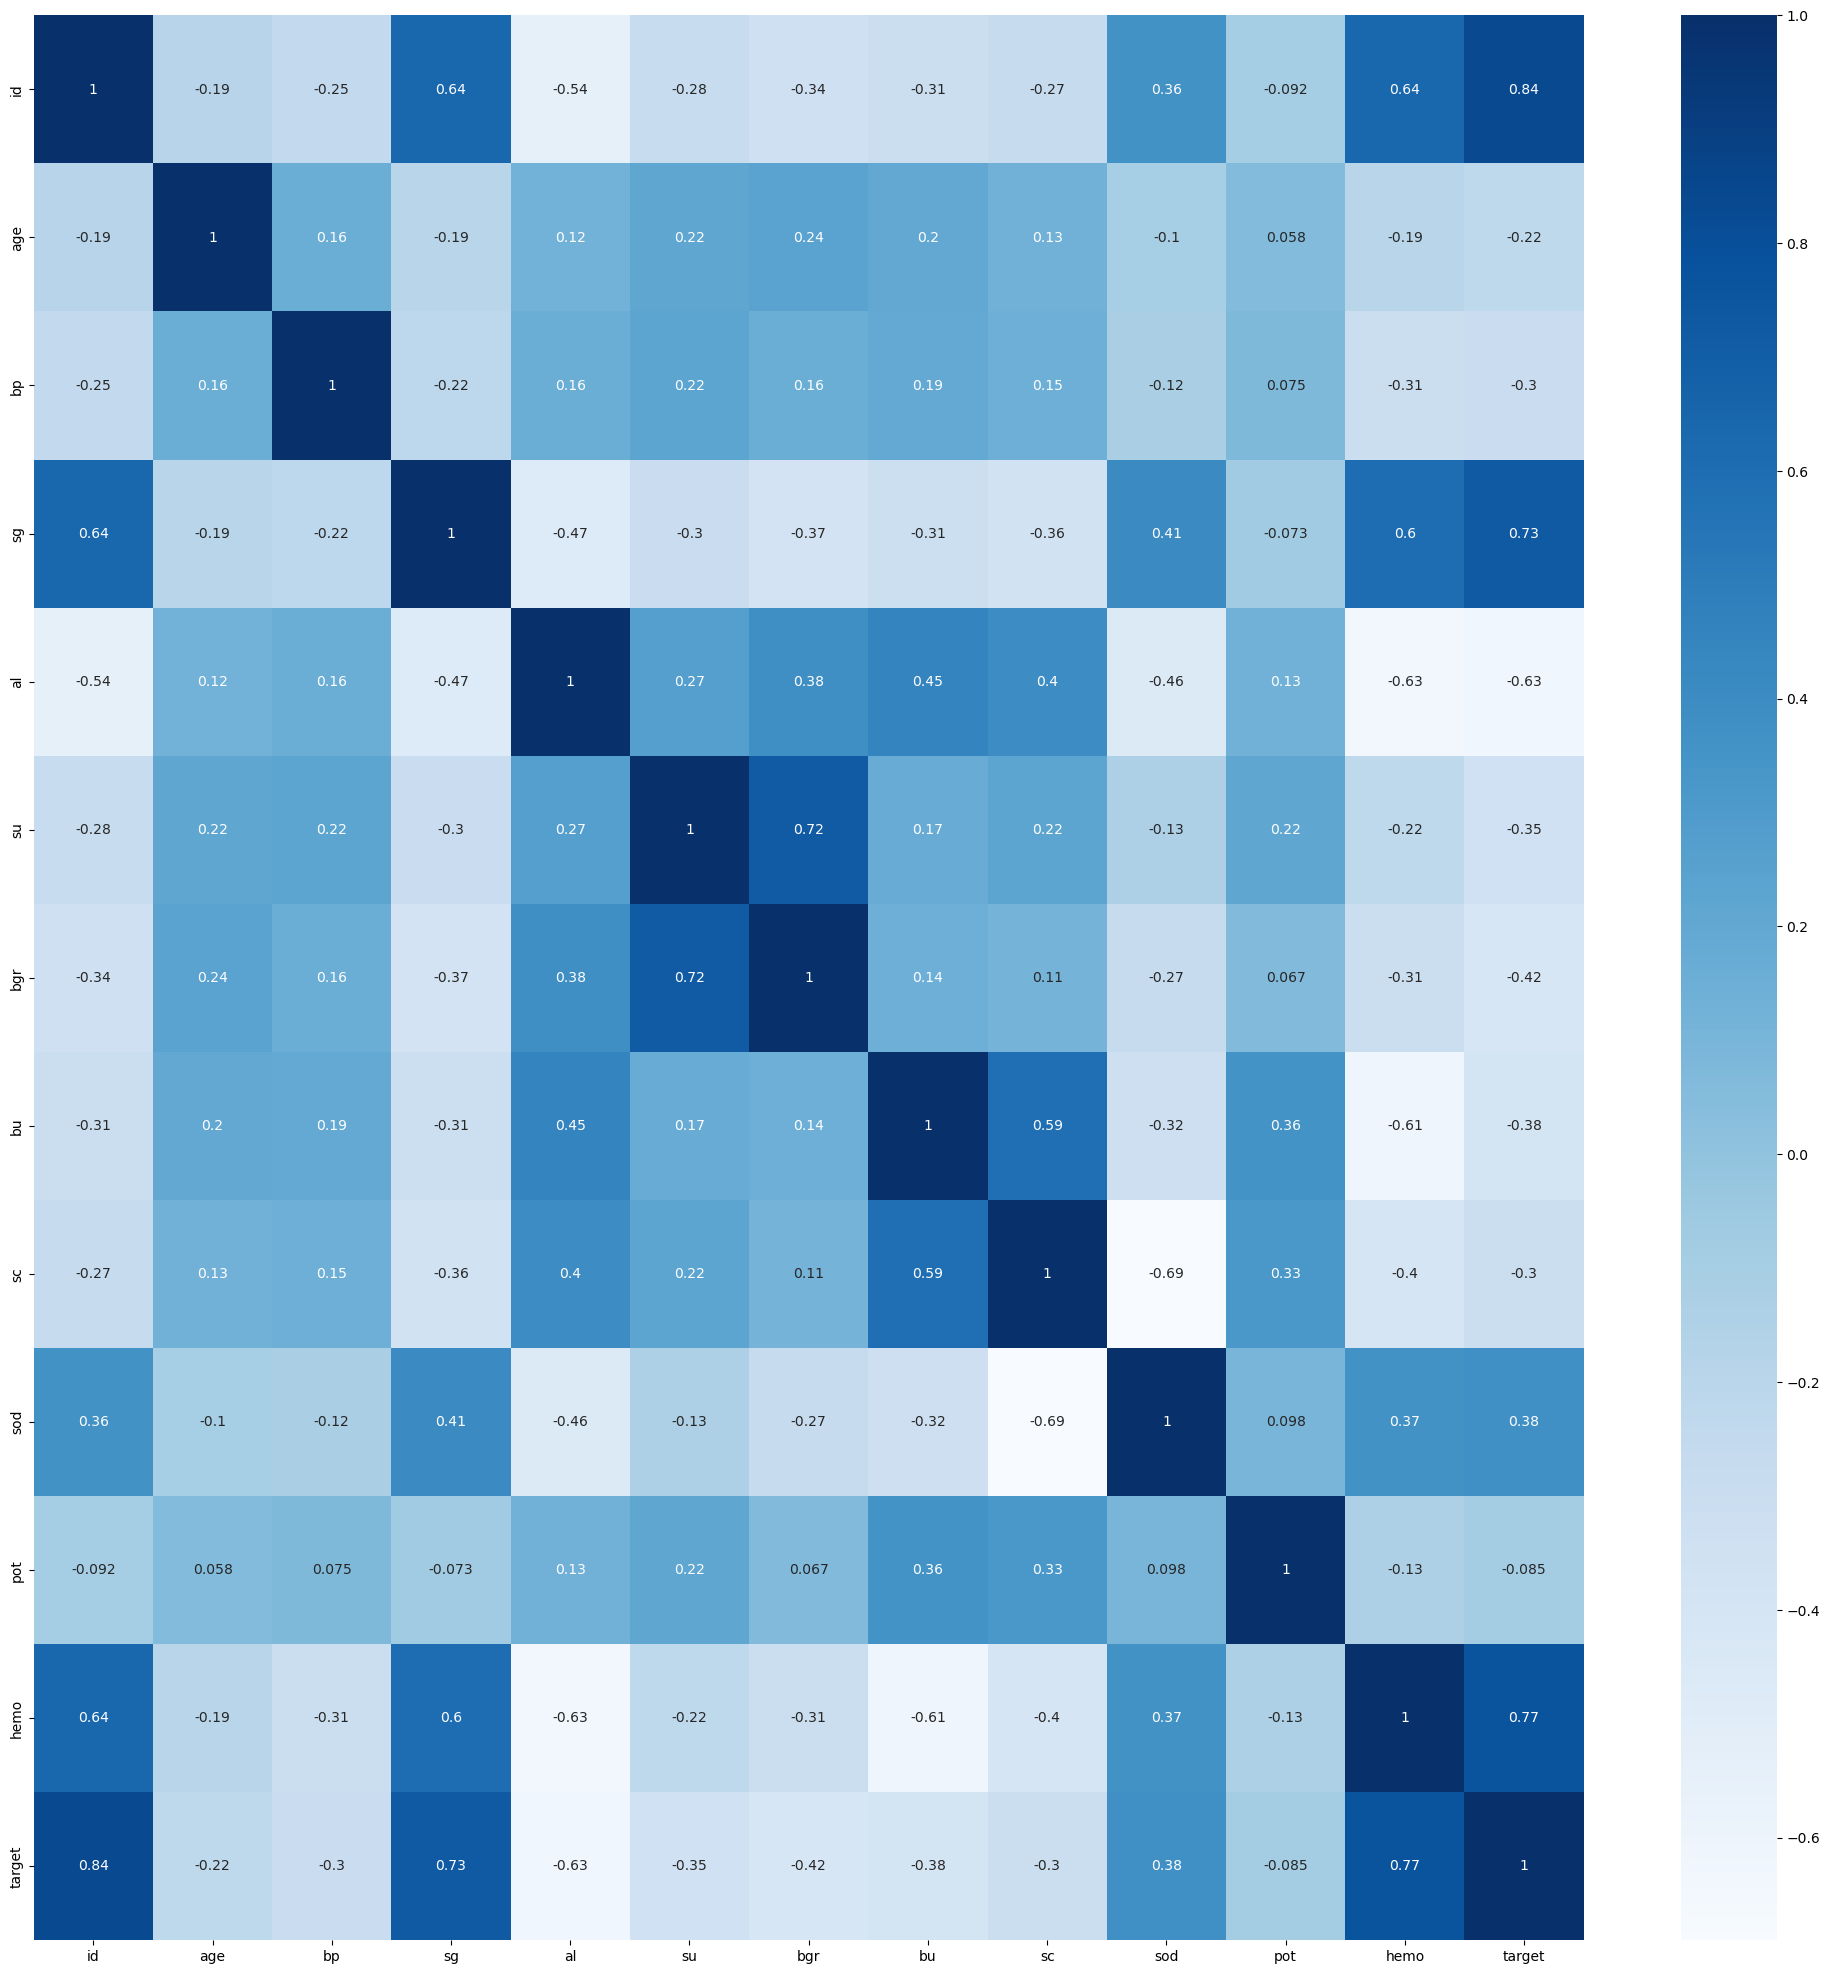

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with mixed data types
# Preprocess the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Create the heatmap using the numeric DataFrame
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(numeric_df.corr(), annot=True, ax=ax, cmap='Blues')
plt.show()


In [36]:
X = df.drop(['target', 'sg', 'appet', 'rc', 'pcv', 'hemo', 'sod'], axis = 1)
Y = df['target']

In [37]:
X.columns

Index(['id', 'age', 'bp', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'pot', 'wc', 'htn', 'dm', 'cad', 'pe', 'ane'],
      dtype='object')

In [34]:
print(X)

      id   age    bp   al   su     rbc        pc         pcc          ba  \
0      0  48.0  80.0  1.0  0.0     NaN    normal  notpresent  notpresent   
1      1   7.0  50.0  4.0  0.0     NaN    normal  notpresent  notpresent   
2      2  62.0  80.0  2.0  3.0  normal    normal  notpresent  notpresent   
3      3  48.0  70.0  4.0  0.0  normal  abnormal     present  notpresent   
4      4  51.0  80.0  2.0  0.0  normal    normal  notpresent  notpresent   
..   ...   ...   ...  ...  ...     ...       ...         ...         ...   
395  395  55.0  80.0  0.0  0.0  normal    normal  notpresent  notpresent   
396  396  42.0  70.0  0.0  0.0  normal    normal  notpresent  notpresent   
397  397  12.0  80.0  0.0  0.0  normal    normal  notpresent  notpresent   
398  398  17.0  60.0  0.0  0.0  normal    normal  notpresent  notpresent   
399  399  58.0  80.0  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr    bu   sc  pot    wc  htn   dm cad   pe  ane  
0    121.0  36.0  1.2  NaN  

In [29]:
print(Y)


0      0
1      0
2      0
3      0
4      0
      ..
395    2
396    2
397    2
398    2
399    2
Name: target, Length: 400, dtype: int32


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [39]:
print(X.shape, X_train.shape, X_test.shape)


(400, 19) (320, 19) (80, 19)


In [47]:
# Replace missing numeric values with the mean of their respective columns
numeric_cols = df.select_dtypes(include=['float64']).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# For categorical columns, replace missing values with the most frequent value
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [48]:
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


In [51]:
X = df.drop('target', axis=1)  # Features
Y = df['target']  # Target variable


In [52]:
print(X)


      id   age    bp     sg   al   su  rbc  pc  pcc  ba  ...  hemo  pcv  wc  \
0      0  48.0  80.0  1.020  1.0  0.0    1   1    0   0  ...  15.4   32  72   
1      1   7.0  50.0  1.020  4.0  0.0    1   1    0   0  ...  11.3   26  56   
2      2  62.0  80.0  1.010  2.0  3.0    1   1    0   0  ...   9.6   19  70   
3      3  48.0  70.0  1.005  4.0  0.0    1   0    1   0  ...  11.2   20  62   
4      4  51.0  80.0  1.010  2.0  0.0    1   1    0   0  ...  11.6   23  68   
..   ...   ...   ...    ...  ...  ...  ...  ..  ...  ..  ...   ...  ...  ..   
395  395  55.0  80.0  1.020  0.0  0.0    1   1    0   0  ...  15.7   35  62   
396  396  42.0  70.0  1.025  0.0  0.0    1   1    0   0  ...  16.5   42  72   
397  397  12.0  80.0  1.020  0.0  0.0    1   1    0   0  ...  15.8   37  61   
398  398  17.0  60.0  1.025  0.0  0.0    1   1    0   0  ...  14.2   39  67   
399  399  58.0  80.0  1.025  0.0  0.0    1   1    0   0  ...  15.8   41  63   

     rc  htn  dm  cad  appet  pe  ane  
0    34    

In [53]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
395    2
396    2
397    2
398    2
399    2
Name: target, Length: 400, dtype: int32


In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [55]:
print(X.shape, X_train.shape, X_test.shape)

(400, 25) (320, 25) (80, 25)


In [56]:
lr = LogisticRegression()
# training the LogisticRegression model with Training data
lr.fit(X_train, Y_train)

LogisticRegression()

In [57]:
# accuracy on training data
Y_pred = lr.predict(X_train)
training_data_accuracy = accuracy_score(Y_pred, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.99375


In [58]:
# accuracy on test data
X_test_prediction = lr.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  1.0



confusion matrix:
[[52  0]
 [ 0 28]]

classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           2       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



<Axes: >

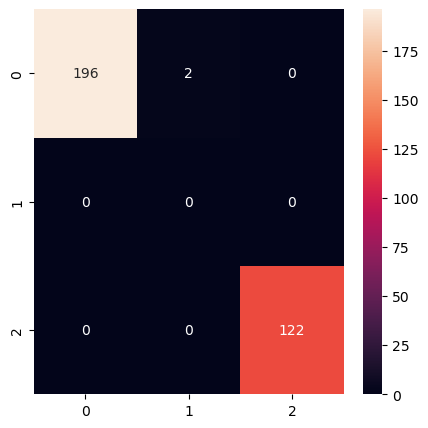

In [61]:
# confusion matrix
print('\nconfusion matrix:')
print(confusion_matrix(Y_test, X_test_prediction))

# classification report
print("\nclassification report:")
print(classification_report(Y_test, X_test_prediction))
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(Y_pred, Y_train), annot = True, fmt = "g")

In [64]:
import pickle

In [66]:
filename = 'kidney_disease.sav'
pickle.dump(lr, open(filename, 'wb'))

In [67]:
# loading the saved model
loaded_model = pickle.load(open('kidney_disease.sav', 'rb'))

In [68]:
for column in X.columns:
  print(column)

id
age
bp
sg
al
su
rbc
pc
pcc
ba
bgr
bu
sc
sod
pot
hemo
pcv
wc
rc
htn
dm
cad
appet
pe
ane
